# Data cleaning

In [1]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import warnings
warnings.filterwarnings("ignore")

'''
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
'''

# Load cleaned dataset
file_path = "data_cleaned_1.csv" 
df = pd.read_csv(file_path)

print("Initial shape:", df.shape)
df.head()

Initial shape: (65077, 13)


,job_id,job_title,company,descriptions,State,merged_category,category,subcategory,role_clean,type_clean,salary,processed_title+desc,processed_text
0,74630583,Procurement Executive (Contract),Coca-Cola Bottlers (Malaysia) Sdn Bhd,Position Purpose\nManage aspects of procuremen...,Negeri Sembilan,Manufacturing & Logistics,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Procurement Executive,Contract/Temp,NaN,procurement executive contract position purpos...,procurement executive contract coca cola bottl...
1,74660602,Account Executive/ Assistant,Acoustic & Lighting System Sdn Bhd,We are looking for a Account Executive/ Assist...,Selangor,Accounting & Finance,Accounting,Bookkeeping & Small Practice Accounting,Executive Assistant,Full time,"RM 2,800 – RM 3,200 per month",account executive assistant looking account ex...,account executive assistant acoustic lighting ...
2,74655679,"Data Analyst - Asset Management, SPX Express",Shopee Mobile Malaysia Sdn Bhd,Performs detailed data analysis on existing sp...,Selangor,Manufacturing & Logistics,"Manufacturing, Transport & Logistics",Analysis & Reporting,Asset Management Analyst,Full time,NaN,data analyst asset management spx express perf...,data analyst asset management spx express shop...
3,74657624,Service Engineer,Sun Medical Systems Sdn Bhd,"You are important for troubleshooting, install...",Selangor,Engineering & Technology,Engineering,Electrical/Electronic Engineering,Services Engineer,Full time,"RM 3,000 – RM 3,500 per month",service engineer important troubleshooting ins...,service engineer sun medical system sdn bhd de...
4,74679363,Purchasing Executive,Magnet Security & Automation Sdn. Bhd.,"MAG is a trailblazer in the industry, boasting...",Selangor,Manufacturing & Logistics,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Purchasing Executive,Full time,"RM 2,800 – RM 3,500 per month",purchasing executive mag trailblazer industry ...,purchasing executive magnet security automatio...


# Simple EDA

In [2]:
print("merged categories:", df["merged_category"].nunique())
print("Unique categories:", df["category"].nunique())
print("Unique subcategories:", df["subcategory"].nunique())
print("\nmerged categories:\n", df["merged_category"].value_counts().head(15))

merged categories: 14
Unique categories: 30
Unique subcategories: 310

merged categories:
 merged_category
Engineering & Technology      17388
Accounting & Finance          12959
Sales & Marketing              8167
Administration                 6772
Manufacturing & Logistics      5143
Hospitality & Services         3934
Human Resources                3846
Construction & Trades          2808
Creative & Design              1224
Healthcare                      860
Education                       762
Social & Community / Other      446
Management & Strategy           413
Legal & Compliance              355
Name: count, dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65077 entries, 0 to 65076
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_id                65077 non-null  int64 
 1   job_title             65077 non-null  object
 2   company               65077 non-null  object
 3   descriptions          65077 non-null  object
 4   State                 65077 non-null  object
 5   merged_category       65077 non-null  object
 6   category              65077 non-null  object
 7   subcategory           65077 non-null  object
 8   role_clean            65077 non-null  object
 9   type_clean            65077 non-null  object
 10  salary                29581 non-null  object
 11  processed_title+desc  65076 non-null  object
 12  processed_text        65077 non-null  object
dtypes: int64(1), object(12)
memory usage: 6.5+ MB


In [4]:
df["processed_title+desc"].isnull().sum()

1

In [5]:
df = df.dropna(subset=["processed_title+desc"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65076 entries, 0 to 65076
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   job_id                65076 non-null  int64 
 1   job_title             65076 non-null  object
 2   company               65076 non-null  object
 3   descriptions          65076 non-null  object
 4   State                 65076 non-null  object
 5   merged_category       65076 non-null  object
 6   category              65076 non-null  object
 7   subcategory           65076 non-null  object
 8   role_clean            65076 non-null  object
 9   type_clean            65076 non-null  object
 10  salary                29580 non-null  object
 11  processed_title+desc  65076 non-null  object
 12  processed_text        65076 non-null  object
dtypes: int64(1), object(12)
memory usage: 7.0+ MB


Category distribution overview:

merged_category
Engineering & Technology      17388
Accounting & Finance          12959
Sales & Marketing              8167
Administration                 6772
Manufacturing & Logistics      5143
Hospitality & Services         3933
Human Resources                3846
Construction & Trades          2808
Creative & Design              1224
Healthcare                      860
Education                       762
Social & Community / Other      446
Management & Strategy           413
Legal & Compliance              355
Name: count, dtype: int64

Number of unique merged categories: 14

Number of unique categories: 30
Number of unique subcategories: 310


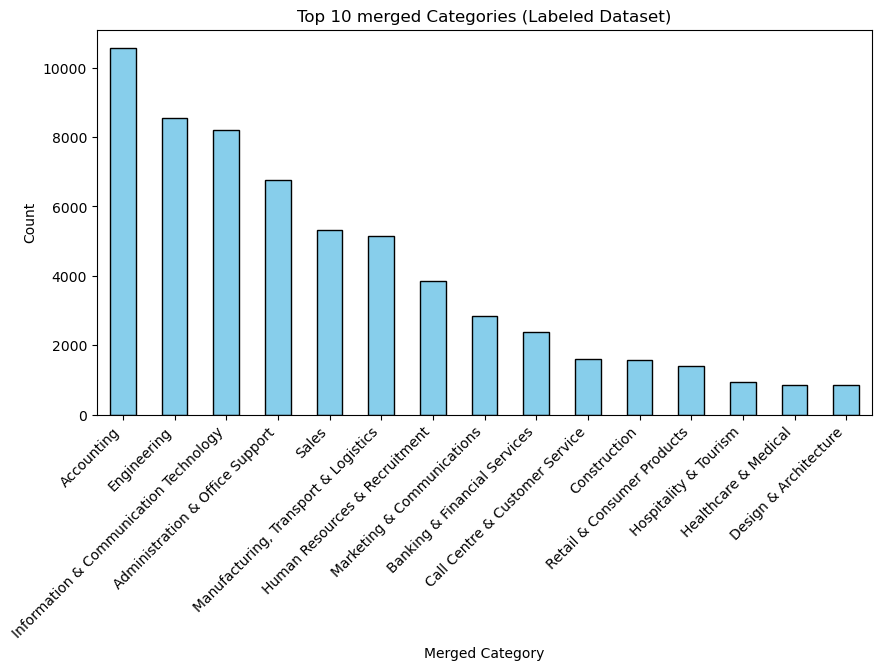


Imbalance ratio (max/min): 48.98
The dataset is highly imbalanced

Text length statistics:
count    65076.000000
mean       193.512985
std        135.677746
min          1.000000
10%         67.000000
25%        103.000000
50%        156.000000
75%        244.000000
90%        373.000000
95%        462.000000
99%        676.000000
max       1377.000000
Name: text_length, dtype: float64

Number of postings above 99th percentile in length: 647
99th percentile text length cutoff: 676.0 words


In [7]:
# Initial EDA

import matplotlib.pyplot as plt

# Category Distribution
print("Category distribution overview:\n")
merged_category_counts = df["merged_category"].value_counts()
category_counts = df["category"].value_counts()
subcategory_counts = df["subcategory"].value_counts()

print(merged_category_counts.head(15))
print("\nNumber of unique merged categories:", len(merged_category_counts))
print("\nNumber of unique categories:", len(category_counts))
print("Number of unique subcategories:", len(subcategory_counts))

# Plot top 10 categories
plt.figure(figsize=(10,5))
category_counts.head(15).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Top 10 merged Categories (Labeled Dataset)")
plt.xlabel("Merged Category")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


# Check for Imbalance
imbalance_ratio = merged_category_counts.max() / merged_category_counts.min()
print(f"\nImbalance ratio (max/min): {imbalance_ratio:.2f}")

# Flag if imbalance is large
if imbalance_ratio > 5:
    print("The dataset is highly imbalanced")
else:
    print("Category distribution are balanced.")


# Text Length Analysis
df["text_length"] = df["processed_title+desc"].apply(lambda x: len(x.split()))

print("\nText length statistics:")
print(df["text_length"].describe(percentiles=[.1, .25, .5, .75, .9, .95, .99]))

# Identify outliers: very long descriptions (e.g., top 1%)
threshold = df["text_length"].quantile(0.99)
long_texts = df[df["text_length"] > threshold]

print(f"\nNumber of postings above 99th percentile in length: {len(long_texts)}")
print(f"99th percentile text length cutoff: {threshold} words")


# LR

In [8]:

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import seaborn as sns

'''nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')'''

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (65076, 14)


,job_id,job_title,company,descriptions,State,merged_category,category,subcategory,role_clean,type_clean,salary,processed_title+desc,processed_text,text_length
0,74630583,Procurement Executive (Contract),Coca-Cola Bottlers (Malaysia) Sdn Bhd,Position Purpose\nManage aspects of procuremen...,Negeri Sembilan,Manufacturing & Logistics,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Procurement Executive,Contract/Temp,NaN,procurement executive contract position purpos...,procurement executive contract coca cola bottl...,197
1,74660602,Account Executive/ Assistant,Acoustic & Lighting System Sdn Bhd,We are looking for a Account Executive/ Assist...,Selangor,Accounting & Finance,Accounting,Bookkeeping & Small Practice Accounting,Executive Assistant,Full time,"RM 2,800 – RM 3,200 per month",account executive assistant looking account ex...,account executive assistant acoustic lighting ...,85
2,74655679,"Data Analyst - Asset Management, SPX Express",Shopee Mobile Malaysia Sdn Bhd,Performs detailed data analysis on existing sp...,Selangor,Manufacturing & Logistics,"Manufacturing, Transport & Logistics",Analysis & Reporting,Asset Management Analyst,Full time,NaN,data analyst asset management spx express perf...,data analyst asset management spx express shop...,99
3,74657624,Service Engineer,Sun Medical Systems Sdn Bhd,"You are important for troubleshooting, install...",Selangor,Engineering & Technology,Engineering,Electrical/Electronic Engineering,Services Engineer,Full time,"RM 3,000 – RM 3,500 per month",service engineer important troubleshooting ins...,service engineer sun medical system sdn bhd de...,145
4,74679363,Purchasing Executive,Magnet Security & Automation Sdn. Bhd.,"MAG is a trailblazer in the industry, boasting...",Selangor,Manufacturing & Logistics,"Manufacturing, Transport & Logistics","Purchasing, Procurement & Inventory",Purchasing Executive,Full time,"RM 2,800 – RM 3,500 per month",purchasing executive mag trailblazer industry ...,purchasing executive magnet security automatio...,200


In [9]:
category_counts = df["merged_category"].value_counts()
rare_classes = merged_category_counts[merged_category_counts < 2].index
print("Removing rare categories with only 1 record:", len(rare_classes))

df_filtered = df[~df["merged_category"].isin(rare_classes)].copy()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_filtered["processed_title+desc"], df_filtered["merged_category"],
    test_size=0.2, random_state=42, stratify=df_filtered["merged_category"]
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])
print("Unique merged categories:", y_train.nunique())


Removing rare categories with only 1 record: 0
Train size: 52060 Test size: 13016
Unique merged categories: 14


## LR-TFIDF

In [10]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import numpy as np


tfidf = TfidfVectorizer(
    max_features=5000,       
    ngram_range=(1, 2),      
    sublinear_tf=True,       
    min_df=3,                
    max_df=0.9              
)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print("TF-IDF shape (train):", X_train_tfidf.shape)

# Model & validation
lr = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)

param_grid = {
    'C': [0.1, 1, 5],
    'penalty': ['l1', 'l2']
}

# 5-fold stratified CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid = GridSearchCV(
    lr, param_grid, cv=cv,
    scoring='f1_weighted',   
    n_jobs=-1, verbose=0
)

grid.fit(X_train_tfidf, y_train)

# Evaluate best model
best_lr = grid.best_estimator_
y_pred = best_lr.predict(X_test_tfidf)

print("\nBest Params:", grid.best_params_)
print("Logistic Regression (TF-IDF) Performance:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

TF-IDF shape (train): (52060, 5000)

Best Params: {'C': 5, 'penalty': 'l2'}
Logistic Regression (TF-IDF) Performance:
                            precision    recall  f1-score   support

      Accounting & Finance       0.93      0.90      0.91      2592
            Administration       0.76      0.73      0.74      1354
     Construction & Trades       0.59      0.66      0.62       562
         Creative & Design       0.69      0.76      0.72       245
                 Education       0.83      0.86      0.84       152
  Engineering & Technology       0.90      0.85      0.88      3478
                Healthcare       0.72      0.82      0.77       172
    Hospitality & Services       0.71      0.73      0.72       787
           Human Resources       0.85      0.89      0.87       769
        Legal & Compliance       0.60      0.73      0.66        71
     Management & Strategy       0.33      0.48      0.39        83
 Manufacturing & Logistics       0.72      0.77      0.75      10

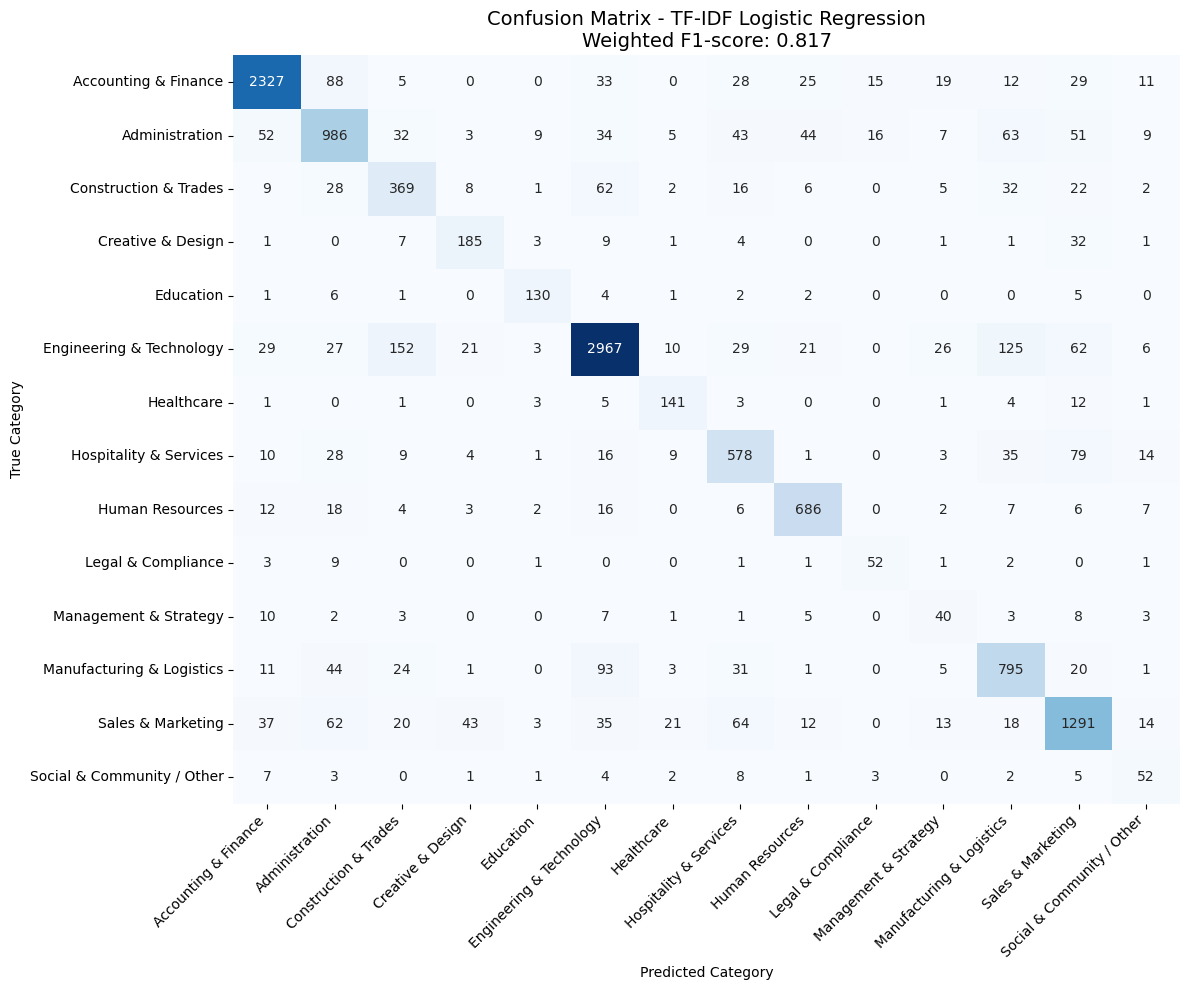

In [11]:
from sklearn.metrics import confusion_matrix, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# confusion matrix and F1
labels = sorted(y_test.unique()) 
cm = confusion_matrix(y_test, y_pred, labels=labels)
f1 = f1_score(y_test, y_pred, average='weighted')


plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Blues", annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title(f"Confusion Matrix - TF-IDF Logistic Regression\nWeighted F1-score: {f1:.3f}", fontsize=14)
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## LR-W2V

In [12]:
def tokenize_words(text):
    return [t for t in word_tokenize(text.lower()) if t.isalpha()]

sentences = df["processed_title+desc"].apply(tokenize_words)

# Train Word2Vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)
print("Word2Vec vocab size:", len(w2v_model.wv))

Word2Vec vocab size: 41147


In [14]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Convert documents to averaged Word2Vec embeddings
def get_doc_vector(tokens, model, vector_size=100):
    valid_words = [w for w in tokens if w in model.wv]
    if not valid_words:
        return np.zeros(vector_size)
    return np.mean(model.wv[valid_words], axis=0)

# Tokenize and convert
X_train_tokens = X_train.apply(tokenize_words)
X_test_tokens = X_test.apply(tokenize_words)

X_train_w2v = np.vstack([get_doc_vector(t, w2v_model) for t in X_train_tokens])
X_test_w2v = np.vstack([get_doc_vector(t, w2v_model) for t in X_test_tokens])

print("Word2Vec vector shapes:", X_train_w2v.shape, X_test_w2v.shape)

# Model setup
lr = LogisticRegression(solver='liblinear', class_weight='balanced', max_iter=1000)


param_grid = {
    'C': [0.1, 1, 5, 10],
    'penalty': ['l1', 'l2']
}

# 5-fold stratified cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search
grid = GridSearchCV(
    lr,
    param_grid,
    cv=cv,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=0
)
grid.fit(X_train_w2v, y_train)

# Evaluate best model
best_lr = grid.best_estimator_
y_pred_w2v = best_lr.predict(X_test_w2v)

print("\nBest Params:", grid.best_params_)
print("Logistic Regression (Word2Vec) Performance:")
print(classification_report(y_test, y_pred_w2v))
print("Accuracy:", accuracy_score(y_test, y_pred_w2v))

Word2Vec vector shapes: (52060, 100) (13016, 100)

Best Params: {'C': 0.1, 'penalty': 'l2'}
Logistic Regression (Word2Vec) Performance:
                            precision    recall  f1-score   support

      Accounting & Finance       0.92      0.85      0.88      2592
            Administration       0.73      0.63      0.67      1354
     Construction & Trades       0.49      0.56      0.53       562
         Creative & Design       0.59      0.76      0.66       245
                 Education       0.65      0.84      0.73       152
  Engineering & Technology       0.89      0.79      0.84      3478
                Healthcare       0.55      0.76      0.64       172
    Hospitality & Services       0.62      0.67      0.64       787
           Human Resources       0.80      0.86      0.83       769
        Legal & Compliance       0.37      0.75      0.49        71
     Management & Strategy       0.17      0.54      0.25        83
 Manufacturing & Logistics       0.69      0.72

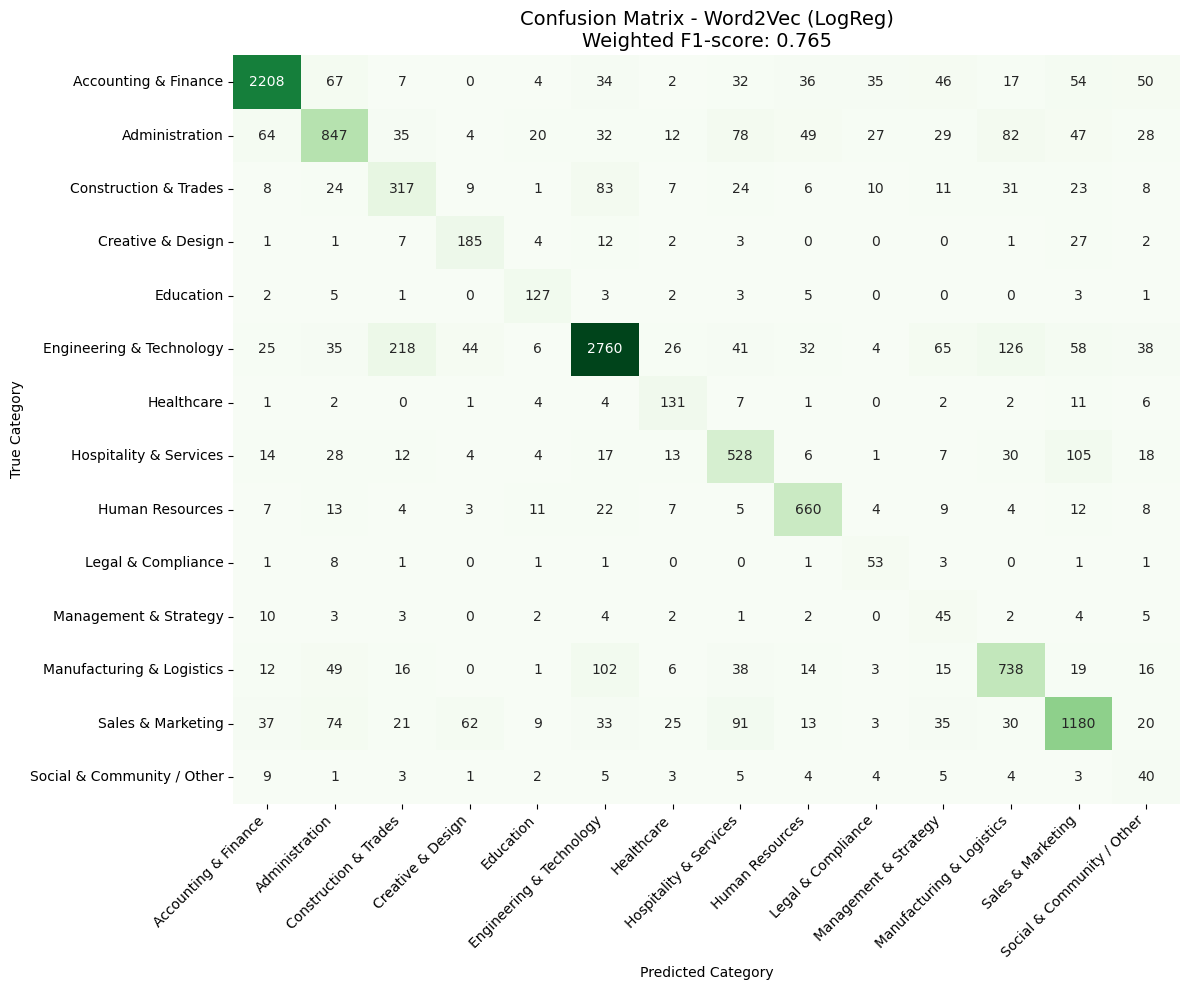

In [15]:
# confusion matrix and F1-score
labels = sorted(y_test.unique())
cm = confusion_matrix(y_test, y_pred_w2v, labels=labels)
f1 = f1_score(y_test, y_pred_w2v, average='weighted')

plt.figure(figsize=(12,10))
sns.heatmap(cm, cmap="Greens", annot=True, fmt='d', cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title(f"Confusion Matrix - Word2Vec (LogReg)\nWeighted F1-score: {f1:.3f}", fontsize=14)
plt.xlabel("Predicted Category")
plt.ylabel("True Category")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [16]:
acc_tfidf = accuracy_score(y_test, y_pred)
acc_w2v = accuracy_score(y_test, y_pred_w2v)

print(f"TF-IDF Accuracy:  {acc_tfidf:.4f}")
print(f"Word2Vec Accuracy: {acc_w2v:.4f}")

TF-IDF Accuracy:  0.8143
Word2Vec Accuracy: 0.7544
